Lection 4, homework-1
--

2022-04-23, Mike N

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

2022-04-23 11:53:53.832338: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-23 11:53:53.832359: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [5]:
%who

Activation	 Dense	 Dropout	 Sequential	 mnist	 np	 np_utils	 plt	 random	 
x_test	 x_train	 y_test	 y_train	 


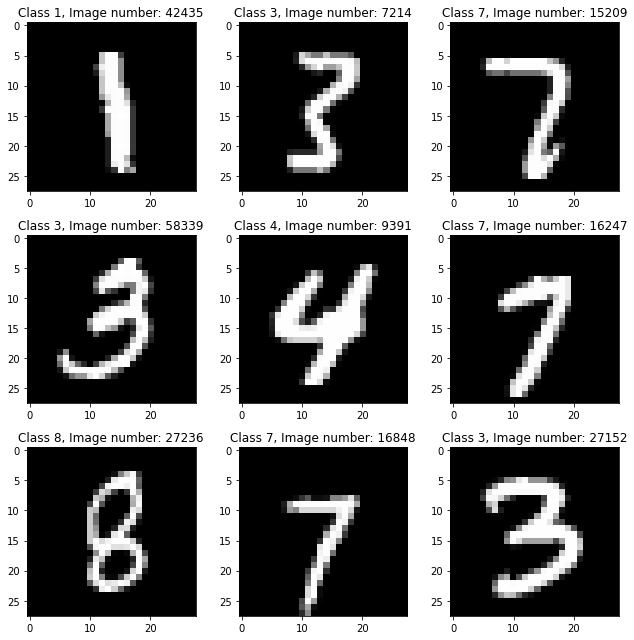

In [6]:
plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}, Image number: {}".format(y_train[num], num))
    
plt.tight_layout()

In [8]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

matprint(x_train[22660])

0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0  147  219   25    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0   65  250  254   46    0    0    0    0    0    0   23    6  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0    4  225  254  176    0    0    0    0    0    0  105  231   41  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0   54  250  254   66    0    0    0    0    0    0  151  254  194  0  0  0  0  0  
0  0  0  0  0    0    0    0    